In [45]:
from  sklearn.datasets import make_classification
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
import numpy as np

In [31]:
x, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,  
    n_redundant=0,  
    n_clusters_per_class=2,
    random_state=42
)

In [32]:
df = pd.DataFrame({'Feature1': x[:, 0], 'Feature2': x[:, 1], 'Target': y})


In [33]:
df

,Feature1,Feature2,Target
0,-0.999102,-0.663860,1
1,1.246686,1.153597,1
2,0.962777,0.859397,1
3,-2.957441,2.033645,1
4,1.141165,1.059449,1
...,...,...,...
995,-0.432774,0.890930,0
996,1.020438,1.164617,1
997,-0.101267,-1.590176,0
998,0.643761,-0.780539,0


<Axes: xlabel='Feature1', ylabel='Feature2'>

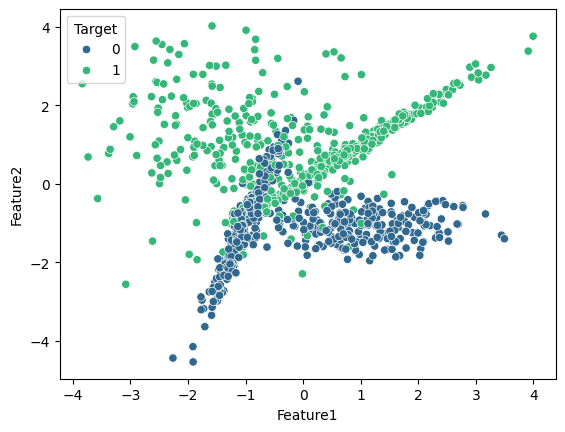

In [34]:
sns.scatterplot(x='Feature1', y='Feature2', hue='Target', data=df, palette='viridis')

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [36]:
precision=[]
max_depths = list(range(1, 100))
for i in range(1,100):
    forest=RandomForestClassifier(n_estimators=i)
    forest.fit(x_train,y_train)
    y_pred=forest.predict(x_test)
    precision.append(precision_score(y_test, y_pred))      

In [37]:
precision

[0.9230769230769231,
 0.9411764705882353,
 0.89,
 0.9139784946236559,
 0.9183673469387755,
 0.9183673469387755,
 0.8921568627450981,
 0.9175257731958762,
 0.9285714285714286,
 0.9375,
 0.9278350515463918,
 0.9278350515463918,
 0.9278350515463918,
 0.9263157894736842,
 0.925531914893617,
 0.900990099009901,
 0.9166666666666666,
 0.925531914893617,
 0.9361702127659575,
 0.9166666666666666,
 0.9175257731958762,
 0.9270833333333334,
 0.9183673469387755,
 0.9191919191919192,
 0.91,
 0.9263157894736842,
 0.9081632653061225,
 0.9270833333333334,
 0.9166666666666666,
 0.9368421052631579,
 0.9191919191919192,
 0.9381443298969072,
 0.91,
 0.9166666666666666,
 0.9278350515463918,
 0.9081632653061225,
 0.9278350515463918,
 0.9081632653061225,
 0.9183673469387755,
 0.9183673469387755,
 0.9175257731958762,
 0.900990099009901,
 0.9072164948453608,
 0.9183673469387755,
 0.9,
 0.8979591836734694,
 0.9081632653061225,
 0.9072164948453608,
 0.900990099009901,
 0.9090909090909091,
 0.9175257731958762,
 0.

### using GridSearchCV to find best parameters 

In [38]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}


In [39]:
forest = RandomForestClassifier()

In [40]:
#f1->f1_score
#precision->precision_score
grid_search=GridSearchCV(forest, param_grid, cv=5, scoring='precision')

In [41]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='precision')

In [42]:
print("Best Parameters:", grid_search.best_params_)
print("Best Precision:", grid_search.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best Precision: 0.9607521204495368


In [43]:
best_model = grid_search.best_estimator_
accuracy = best_model.score(x_test, y_test)
print(accuracy)

0.895


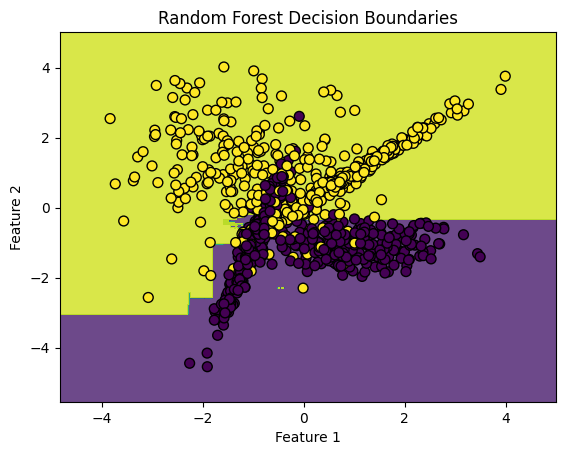

In [46]:
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Plot decision boundaries
Z = best_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', marker='o', s=50, linewidth=1)

plt.title('Random Forest Decision Boundaries')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()